<a href="https://colab.research.google.com/github/JsonLin117/-/blob/main/Propet_AI_Tool_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import 不論跑什麼東西都先跑這一步

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

from sklearn.datasets import load_iris, make_moons, load_diabetes

from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, LassoCV, LinearRegression, Ridge, ElasticNet, SGDRegressor, Lars, HuberRegressor, TheilSenRegressor, Lasso, OrthogonalMatchingPursuit, ARDRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC, NuSVC, SVR, LinearSVR, NuSVR
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, ShuffleSplit, cross_validate, train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler,  MaxAbsScaler, Binarizer, FunctionTransformer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold, SelectFromModel, RFE, RFECV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
from sklearn.exceptions import ConvergenceWarning


from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
!pip install scikeras
import scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor
from scipy.stats import randint
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

sns.set(style='white', context='notebook', palette='deep')

In [ ]:
# 如果是csv
df = pd.read_csv('這裡填上檔案名稱.csv')
df.head()

In [ ]:
#如果是excel
df = pd.read_excel('這裡填上檔案名稱.xlsx')
df.head()

In [ ]:
# 假設y 是在最後一列
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Visualize Data & Data Exploration

## 統計概述

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
def print_array_statistics(X):
    """
    計算並打印數據集的統計量

    參數:
    X (ndarray): 特徵

    返回:
    None
    """
    mean = np.mean(X, axis=0)
    median = np.median(X, axis=0)
    std_dev = np.std(X, axis=0)
    variance = np.var(X, axis=0)

    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")

Mean: [5.84333333 3.05733333 3.758      1.19933333]
Median: [5.8  3.   4.35 1.3 ]
Standard Deviation: [0.82530129 0.43441097 1.75940407 0.75969263]
Variance: [0.68112222 0.18871289 3.09550267 0.57713289]


In [ ]:
# DataFrame 的情況
df = pd.DataFrame(X)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 熱力圖

In [ ]:
# 假設 train 是已載入的 DataFrame
# train = pd.read_csv('your_data.csv') # 模擬載入數據

def plot_correlation_heatmap(df, y_col, x_cols, cmap='coolwarm', fmt=".2f"):
     """
     繪製特定列的相關性熱力圖。

     :param df: DataFrame，包含資料。
     :param y_col: 目標變數的列名。
     :param x_cols: list of strings，特徵變數的列名清單。
     :param cmap: 熱力圖映射。('coolwarm', 'BrBG')
     :param fmt: 顯示在熱力圖單元格中的浮點數格式。
     """
     # 檢查列名是否存在於DataFrame中
     missing_cols = [col for col in [y_col] + x_cols if col not in df.columns]
     if missing_cols:
         raise ValueError(f"Columns {missing_cols} not in DataFrame.")

     # 建立相關性矩陣
     correlation_matrix = df[[y_col] + x_cols].corr()

     # 繪製熱力圖
     plt.figure(figsize=(10, 8))
     sns.heatmap(correlation_matrix, annot=True, fmt=fmt, cmap=cmap)
     plt.title('Correlation Heatmap')
     plt.show()

# 範例使用
train = pd.DataFrame({
     'y': [1, 2, 3, 4, 5],
     'X1': [5, 4, 3, 2, 1],
     'X2': [1, 2, 1, 2, 1],
     'X3': [5, 3, 4, 2, 1],
     'X4': [7, 8, 7, 8, 7]
})

In [ ]:
# 呼叫函數，指定目標變數和特徵變數
plot_correlation_heatmap(train, 'y', ['X1', 'X2', 'X3', 'X4']) # 自行更換

In [ ]:
def plot_correlation_heatmap(X, y, cmap='coolwarm', fmt=".2f"):
    df = X.copy()
    df['target'] = y
    plot_correlation_heatmap_from_df(df, 'target', list(X.columns), cmap, fmt)

# 如果已經區分 X 和 y
# X = train.iloc[:, :-1]
# y = train.iloc[:, -1]

# 繪製相關性熱力圖
plot_correlation_heatmap(X, y)

## 比較X特徵與y的關係 長方圖

In [ ]:
def plot_categorical_relationship(df, x_col, y_col, kind="bar", palette="muted", title="", xlabel="", ylabel="", hue=None, legend=True):
     """
     繪製分類關係圖，並根據hue參數分層顯示資料。

     :param df: DataFrame，包含資料。
     :param x_col: X軸上的特徵列名。
     :param y_col: Y軸上的特徵列名。
     :param kind: 圖的種類（'bar', 'box', 'violin', 'count', 'point'）。
     :param palette: 使用的調色盤。
     :param title: 圖的標題。
     :param xlabel: X軸的標籤。
     :param ylabel: Y軸的標籤。
     :param hue: 用於在圖中分層的分類變數列名。
     :param legend: 是否顯示圖例。
     """
     # 建立圖形
     g = sns.catplot(x=x_col, y=y_col, hue=hue, data=df, kind=kind, palette=palette, legend=legend)
     g.despine(left=True) # 移除左側邊框線
     g.set_axis_labels(xlabel, ylabel) # 設定軸標籤
     g.fig.suptitle(title) # 設定標題
     g.fig.subplots_adjust(top=0.9) # 調整標題位置

     if not legend:
         g._legend.remove() # 若不顯示圖例，請把 legend = 'False'

     # 顯示圖形
     plt.show()

# 範例使用
data = pd.DataFrame({
     'y': [1, 2, 3, 4, 5],
     'X1': ['A', 'B', 'A', 'B', 'A'],
     'Group': ['One', 'One', 'Two', 'Two', 'One']
})

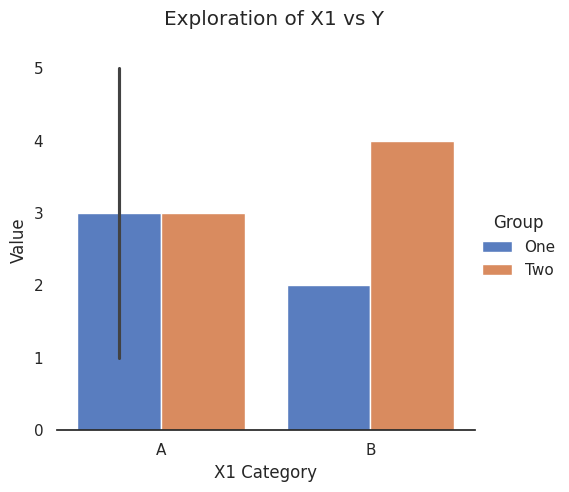

In [ ]:
# 呼叫函數
plot_categorical_relationship(data, 'X1', 'y', kind="bar", palette="muted", title="Exploration of X1 vs Y", xlabel="X1 Category", ylabel="Value", hue='Group', legend=True)

In [ ]:
def plot_all_categorical_relationships(X, y, kind="bar", palette="muted", title_prefix="", xlabel="", ylabel="", hue=None, legend=True):
    """
    繪製所有特徵與目標變數之間的分類關係圖。

    :param X: DataFrame，特徵變數。
    :param y: Series，目標變數。
    :param kind: 圖的種類（'bar', 'box', 'violin', 'count', 'point'）。
    :param palette: 使用的調色盤。
    :param title_prefix: 圖的標題前綴。
    :param xlabel: X軸的標籤。
    :param ylabel: Y軸的標籤。
    :param hue: 用於在圖中分層的分類變數列名。
    :param legend: 是否顯示圖例。
    """
    df = X.copy()
    df['target'] = y

    for col in X.columns:
        plot_categorical_relationship(df, x_col=col, y_col='target', kind=kind, palette=palette,
                                      title=f"{title_prefix} {col} vs target", xlabel=col, ylabel=ylabel,
                                      hue=hue, legend=legend)

# 如果已經區分X, y
# X = train.iloc[:, :-1]
# y = train.iloc[:, -1]

# 繪製所有特徵與目標變數之間的分類關係圖
plot_all_categorical_relationships(X, y, kind="bar", title_prefix="Relationship between", xlabel="", ylabel="Target")

In [ ]:
# 如果是分類 可以看每個分類下與X的關係
# Explore X1 vs y(可能有多個分類 ex:(Up, Down, Steady))
g = sns.FacetGrid(train, col="y")
g = g.map(sns.histplot, "X1", kde=True, stat = 'density', kde_kws=dict(cut=3))

## 查看特徵的分布圖

In [ ]:
def plot_feature_distribution(df, feature_name, color="m", title="Feature Distribution"):
     """
     繪製特徵的分佈圖，包括直方圖和核密度估計。

     :param df: DataFrame，包含資料。
     :param feature_name: 要繪製的特徵列名。
     :param color: 圖表使用的顏色。
     :param title:圖表的標題。
     """
     # 檢查特徵是否存在於DataFrame中
     if feature_name not in df.columns:
         raise ValueError(f"{feature_name} does not exist in the DataFrame.")

     # 繪製核密度估計和直方圖
     plt.figure(figsize=(10, 6))
     sns.kdeplot(df[feature_name], color=color, label="Kernel Density Estimate", fill=True)
     sns.histplot(df[feature_name], color=color, kde=True, stat='density', alpha=0.3)
     plt.title(title)
     plt.xlabel(feature_name)
     plt.ylabel('Density')
     plt.legend(title="Skewness", labels=["%.2f" % df[feature_name].skew()])
     plt.grid(True)
     plt.show()

# 範例資料和使用
data = pd.DataFrame({
     'X': np.random.gamma(2, 2, 1000) # 產生一些範例數據
})

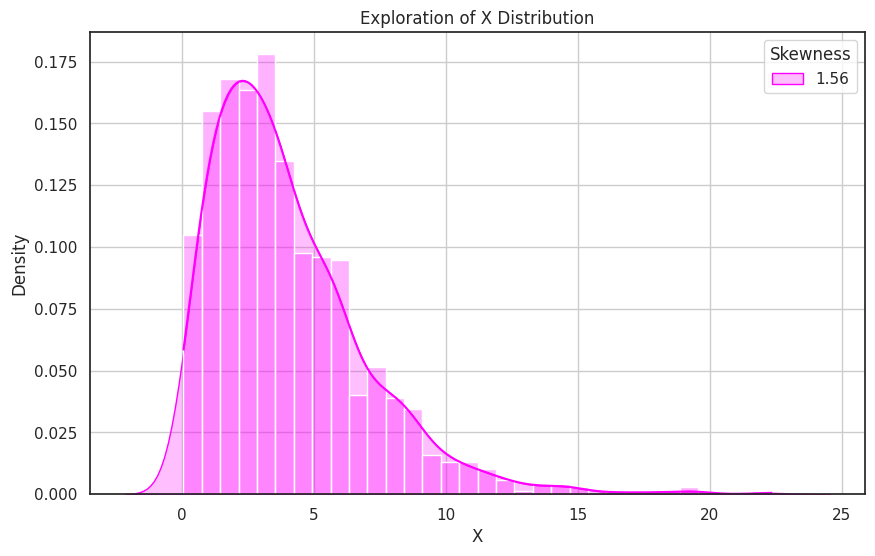

In [ ]:
plot_feature_distribution(data, 'X', color="magenta", title="Exploration of X Distribution")

In [ ]:
def plot_all_feature_distributions(df, color="m", title_prefix="Feature Distribution: "):
    """
    繪製所有特徵的分佈圖，包括直方圖和核密度估計。

    :param df: DataFrame，包含資料。
    :param color: 圖表使用的顏色。
    :param title_prefix: 圖表標題的前綴。
    """
    for feature in df.columns:
        plot_feature_distribution(df, feature_name=feature, color=color, title=f"{title_prefix}{feature}")

# 如果已經區分X, y
# X = train.iloc[:, :-1]
# y = train.iloc[:, -1]

# 繪製所有特徵的分佈圖
plot_all_feature_distributions(X)

In [ ]:
# 如果分布偏態 需要轉換的話
# 調用 transform_feature(df, column_name, transformations) 上面"數據轉換"有寫

## 計數圖 (Count Plot)

In [ ]:
def plot_count(df, x_col, order, palette, title, xlabel, ylabel, ticks, labels, hue=None):
     """
     繪製分類變數的計數圖。

     :param df: DataFrame，包含資料。
     :param x_col: 要計數的X軸上的特徵列名。
     :param order: X軸上顯示的順序。
     :param palette: 使用的調色盤。
     :param title: 圖的標題。
     :param xlabel: X軸的標籤。
     :param ylabel: Y軸的標籤。
     :param ticks: X軸刻度的位置。
     :param labels: X軸刻度的標籤。
     :param hue: 用於在圖中分層的分類變數列名。
     """
     # 建立計數圖
     if hue:
         g = sns.countplot(x=x_col, hue=hue, data=df, order=order, palette=palette)
     else:
         g = sns.countplot(x=x_col, data=df, order=order, palette=palette)

     plt.xlabel(xlabel)
     plt.ylabel(ylabel)
     plt.title(title)
     plt.xticks(ticks=ticks, labels=labels)
     if not hue:
         plt.legend([],[], frameon=False) # 若沒有使用hue參數，移除圖例
     plt.show()

# 範例數據
data = pd.DataFrame({
    'VehicleType': ['Car', 'Truck', 'Motorcycle', 'Bicycle', 'Car', 'Truck', 'Motorcycle', 'Bicycle'],
    'Color': ['Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue', 'Red', 'Blue']
})

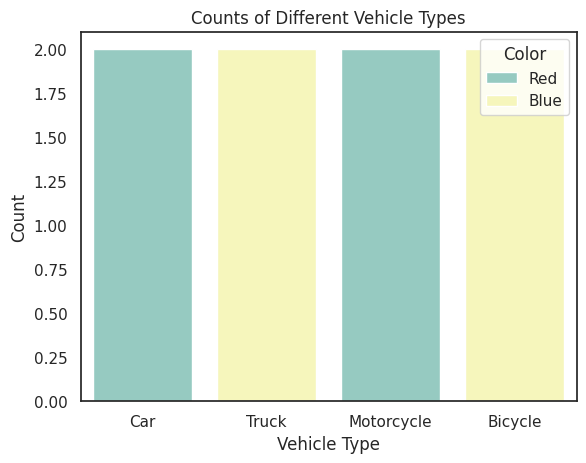

In [ ]:
plot_count(
    df=data,
    x_col='VehicleType',
    order=['Car', 'Truck', 'Motorcycle', 'Bicycle'],
    palette='Set3',
    title='Counts of Different Vehicle Types',
    xlabel='Vehicle Type',
    ylabel='Count',
    ticks=[0, 1, 2, 3],
    labels=['Car', 'Truck', 'Motorcycle', 'Bicycle'],
    hue='Color'
)

# 合併兩個csv 相同列名的數據(Optional)

In [ ]:
def merge_files(file1_path, file2_path, output_file_path, file_type='csv', common_columns=None):
    """
    合併兩個文件並保存結果

    參數:
    file1_path (str): 第一個文件的路徑
    file2_path (str): 第二個文件的路徑
    output_file_path (str): 輸出的文件路徑
    file_type (str): 文件類型，'csv' 或 'excel'
    common_columns (list or str): 用於合併的共同列名或列名列表，默認為 None

    返回:
    None
    """
    if file_type == 'csv':
        df1 = pd.read_csv(file1_path)
        df2 = pd.read_csv(file2_path)
    elif file_type == 'excel':
        df1 = pd.read_excel(file1_path)
        df2 = pd.read_excel(file2_path)
    else:
        raise ValueError("Unsupported file type. Please choose 'csv' or 'excel'.")

    # 合併數據框
    if common_columns is None:
        merged_df = pd.merge(df1, df2, on='common_column')
    else:
        merged_df = pd.merge(df1, df2, on=common_columns)

    # 保存合併後的文件
    if file_type == 'csv':
        merged_df.to_csv(output_file_path, index=False)
    elif file_type == 'excel':
        merged_df.to_excel(output_file_path, index=False)

    print("Merged DataFrame saved to:", output_file_path)

In [ ]:
# 使用範例
file1_path = 'file1.csv'  # 替換成你的文件名
file2_path = 'file2.csv'  # 替換成你的文件名
output_file_path = 'merged_file.csv'  # 輸出的文件名

# 使用默認的 'common_column' 只合併相同的列
merge_files(file1_path, file2_path, output_file_path, file_type='csv')

# 使用用戶指定的合併列（單個列名）
merge_files(file1_path, file2_path, output_file_path, file_type='csv', common_columns='col1')

# 使用用戶指定的合併列（多個列名）
merge_files(file1_path, file2_path, output_file_path, file_type='csv', common_columns=['col1', 'col2'])

# 轉換日期格式 (Optional)

In [ ]:
def process_date_column(file_path, date_column, output_file_path, file_type='csv', date_format='%Y-%m-%d'):
    """
    讀取文件並處理日期列，然後保存結果

    參數:
    file_path (str): 要讀取的文件路徑
    date_column (str): 包含日期的列名
    output_file_path (str): 保存結果的文件路徑
    file_type (str): 文件類型，'csv' 或 'excel'
    date_format (str): 日期格式，默認為 '%Y-%m-%d'

    返回:
    None
    """
    # 讀取文件
    if file_type == 'csv':
        df = pd.read_csv(file_path)
    elif file_type == 'excel':
        df = pd.read_excel(file_path)
    else:
        raise ValueError("Unsupported file type. Please choose 'csv' or 'excel'.")

    # 處理日期列
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)

    # 保存處理後的文件
    if file_type == 'csv':
        df.to_csv(output_file_path, index=False)
    elif file_type == 'excel':
        df.to_excel(output_file_path, index=False)

    print("Processed DataFrame saved to:", output_file_path)

In [ ]:
# 使用範例
file_path = 'profetai01.csv'  # 替換成你的文件名
date_column = 'Date'  # 替換成包含日期的列名
output_file_path = 'dateconverted01.csv'  # 替換成輸出文件的路徑

# 處理 CSV 文件
process_date_column(file_path, date_column, output_file_path, file_type='csv')

# 處理 Excel 文件
# process_date_column(file_path, date_column, output_file_path, file_type='excel', date_format='%Y/%m/%d')

# 異常值處理

In [ ]:
def detect_noise_points(X, eps=0.5, min_samples=5):
    """
    使用 DBSCAN 檢測噪音點並打印結果，但不做處理

    參數:
    X (DataFrame): 特徵數據
    eps (float): DBSCAN 中的鄰域半徑參數，默認為0.5
    min_samples (int): DBSCAN 中的最小樣本數參數，默認為5

    返回:
    DataFrame: 添加噪音點標籤的數據
    """
    # 數據標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)

    # 新增標籤到資料中以識別雜訊點
    X['cluster_label'] = labels
    X['is_noise'] = X['cluster_label'] == -1

    # 查看噪音點
    print("Noise points:")
    print(X[X['is_noise']])

    return X

# 使用範例
# X_with_noise_labels = detect_noise_points(X, eps=0.5, min_samples=5)


In [ ]:
def handle_noise_points_dbscan(X, replace_noise_with_mean=True):
    """
    處理噪音點，可以選擇替換或刪除噪音點

    參數:
    X (DataFrame): 含噪音點標籤的數據
    replace_noise_with_mean (bool): 是否用平均值替換噪音點，默認為True

    返回:
    DataFrame: 經處理後的數據
    """
    if 'is_noise' not in X.columns or 'cluster_label' not in X.columns:
        raise ValueError("DataFrame 必須包含 'is_noise' 和 'cluster_label' 列")

    if replace_noise_with_mean:
        # 替換雜訊點的值
        for column in X.columns[:-2]:  # 排除最後新增的標籤列
            mean_value = X[X['cluster_label'] != -1][column].mean()
            X.loc[X['is_noise'], column] = mean_value
    else:
        # 刪除雜訊點
        X = X[X['cluster_label'] != -1]

    # 刪除輔助列
    X_clean = X.drop(columns=['cluster_label', 'is_noise'])

    # 再次查看處理後的數據
    print("Cleaned data preview:")
    print(X_clean.head())

    return X_clean

# 使用範例
# X_clean = handle_noise_points_dbscan(X_with_noise_labels, replace_noise_with_mean=True)

In [ ]:
def detect_outliers_zscore(X, threshold=3):
    """
    使用 Z-Score 檢測異常值並打印結果

    參數:
    X (DataFrame): 特徵數據
    threshold (float): Z-Score 的閾值，默認為3

    返回:
    DataFrame: 標記異常值的數據
    """
    # 計算 Z-Score
    z_scores = np.abs(stats.zscore(X))

    # 找到異常值的位置
    outliers = np.where(z_scores > threshold)

    # 標記異常值
    for feature, outlier_indices in zip(X.columns, outliers):
        if outlier_indices.size > 0:
            print(f"Outliers in {feature} based on Z-Score:")
            print(X.iloc[outlier_indices][feature])

    return X, z_scores

# 使用範例
# X_with_outliers, z_scores = detect_outliers_zscore(X, threshold=3)

In [ ]:
def handle_outliers_zscore(X, z_scores, threshold=3, method='remove'):
    """
    處理異常值，可以選擇刪除或其他方法

    參數:
    X (DataFrame): 含異常值的數據
    z_scores (ndarray): 計算出的 Z-Score
    threshold (float): Z-Score 的閾值，默認為3
    method (str): 處理異常值的方法，默認為 'remove'，可以選擇 'remove' 或 'replace_with_mean'

    返回:
    DataFrame: 經處理後的數據
    """
    if method == 'remove':
        X_clean = X[(z_scores < threshold).all(axis=1)]
    elif method == 'replace_with_mean':
        X_clean = X.copy()
        for feature in X.columns:
            mean_value = X_clean[(z_scores[:, X.columns.get_loc(feature)] < threshold)][feature].mean()
            X_clean.loc[z_scores[:, X.columns.get_loc(feature)] >= threshold, feature] = mean_value
    else:
        raise ValueError("Method must be 'remove' or 'replace_with_mean'")

    print("\nData after handling outliers:")
    print(X_clean.describe())

    return X_clean

In [ ]:
def visualize_data_distribution(X):
    """
    可視化資料分佈，檢查處理後的效果

    參數:
    X (DataFrame): 經處理後的數據
    """
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(X.columns, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=X[feature])
        plt.title(feature)
    plt.tight_layout()
    plt.show()

# 使用範例
# X_clean = handle_outliers_zscore(X_with_outliers, z_scores, threshold=3, method='remove')
# visualize_data_distribution(X_clean)

In [ ]:
def detect_outliers_tukey(df, n, features):
    """
    檢測數據中的異常值，根據 Tukey 方法返回異常值的索引列表

    參數:
    df (DataFrame): 數據框
    n (int): 超過此數量的異常值才會被認為是異常點
    features (List[str]): 要檢測異常值的特徵列表

    返回:
    List[int]: 異常值的索引列表
    """
    outlier_indices = []

    # 遍歷特徵（列）
    for col in features:
        # 第一四分位數 (25%)
        Q1 = np.percentile(df[col], 25)
        # 第三四分位數 (75%)
        Q3 = np.percentile(df[col], 75)
        # 四分位距 (IQR)
        IQR = Q3 - Q1

        # 異常值步長
        outlier_step = 1.5 * IQR

        # 找到特徵 col 的異常值索引列表
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # 將找到的異常值索引附加到異常值索引列表中
        outlier_indices.extend(outlier_list_col)

    # 選擇包含超過 n 個異常值的觀測值
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

# 使用範例
# outliers = detect_outliers_tukey(df, n=2, features=['feature1', 'feature2', 'feature3'])
# print("Outliers detected:", outliers)

In [ ]:
def handle_outliers_tukey(df, outlier_indices, method='remove'):
    """
    處理異常值，可以選擇刪除或其他方法

    參數:
    df (DataFrame): 數據框
    outlier_indices (List[int]): 異常值的索引列表
    method (str): 處理異常值的方法，默認為 'remove'

    返回:
    DataFrame: 經處理後的數據框
    """
    if method == 'remove':
        df_clean = df.drop(outlier_indices)
    elif method == 'replace_with_mean':
        df_clean = df.copy()
        for col in df.columns:
            if col not in ['is_noise', 'cluster_label']:  # 排除不需要替換的列
                mean_value = df_clean.loc[~df_clean.index.isin(outlier_indices), col].mean()
                df_clean.loc[df_clean.index.isin(outlier_indices), col] = mean_value
    else:
        raise ValueError("Method must be 'remove' or 'replace_with_mean'")

    return df_clean

# 使用範例
# df_clean = handle_outliers_tukey(df, outliers, method='remove')
# print("Data after handling outliers:", df_clean.head())

# 數據轉換

In [ ]:
def transform_feature(df, column_name, transformations):
     """
     對指定列套用不同的資料轉換。

     :param df: DataFrame，包含資料。
     :param column_name: 要轉換的列名。
     :param transformations: 包含要套用的轉換類型，如'log', 'sqrt', 'boxcox'。
     :return: DataFrame，包含原始和轉換後的列。
     """
     # 檢查列名是否在DataFrame中
     if column_name not in df.columns:
         raise ValueError(f"{column_name} does not exist in the DataFrame.")

     # 建立一個資料副本以避免修改原始數據
     df_transformed = df.copy()

     # 對每個指定的轉換類型進行處理
     for transform in transformations:
         if transform == 'log':
             # 對數轉換，處理非正值
             df_transformed[f'log_{column_name}'] = np.log(df_transformed[column_name] + 1)

         elif transform == 'sqrt':
             # 平方根轉換，處理非正值
             df_transformed[f'sqrt_{column_name}'] = np.sqrt(df_transformed[column_name] + 1)

         elif transform == 'boxcox':
             # Box-Cox 轉換，確保所有資料為正
             adjusted_column = df_transformed[column_name] + 1 - df_transformed[column_name].min()
             df_transformed[f'boxcox_{column_name}'], _ = stats.boxcox(adjusted_column)

         else:
             raise ValueError(f"Transformation '{transform}' is not supported.")

     return df_transformed

# 範例使用
'''data = pd.DataFrame({
     'sales': np.random.gamma(2, 2, 100) - 1 # 建立一些可能包含零或負數的數據
})'''

In [ ]:
# 呼叫函數，轉換 'sales' 列
transformed_data = transform_feature(data, 'sales', ['log', 'sqrt', 'boxcox'])
print(transformed_data.head())

      sales  log_sales  sqrt_sales  boxcox_sales
0  4.246202   1.657504    2.290459      2.539093
1  5.755906   1.910417    2.599213      3.004623
2  1.520029   0.924270    1.587460      1.459333
3  2.582861   1.276162    1.892845      1.930635
4  6.471030   2.011033    2.733319      3.204654


# 特徵選擇

## 卡方檢驗（Chi-squared test）

In [ ]:
def select_top_k_features(X, y, k=10):
    """
    選擇得分最高的前K個特徵

    參數:
    X (DataFrame): 特徵數據
    y (Series): 目標變量
    k (int): 選擇的特徵數量

    返回:
    DataFrame: 選擇的前K個特徵
    List: 選擇的特徵名稱
    """
    chi_selector = SelectKBest(chi2, k=k)
    X_kbest = chi_selector.fit_transform(X, y)
    selected_features = X.columns[chi_selector.get_support()]

    return X_kbest, selected_features

# 使用範例
# X_kbest, selected_features = select_top_k_features(X, y, k=10)
# print("Selected features:", selected_features)

## 方差閾值（Variance Threshold）

In [ ]:
def select_high_variance_features(X, threshold=0.8):
    """
    選擇方差高於閾值的特徵

    參數:
    X (DataFrame): 特徵數據
    threshold (float): 方差閾值，預設為0.8

    返回:
    DataFrame: 選擇的高方差特徵
    List: 選擇的特徵名稱
    """
    thresholder = VarianceThreshold(threshold=(threshold * (1 - threshold)))
    X_high_variance = thresholder.fit_transform(X)
    selected_features = X.columns[thresholder.get_support()]

    return X_high_variance, selected_features

# 使用範例
# X_high_variance, selected_features = select_high_variance_features(X, threshold=0.8)
# print("Selected features:", selected_features)

## LASSO (Least Absolute Shrinkage and Selection Operator)

In [ ]:
def select_lasso_features(X, y, cv=5):
    """
    使用 LassoCV 進行特徵選擇

    參數:
    X (DataFrame): 特徵數據
    y (Series): 目標變量
    cv (int): 交叉驗證折數，默認為5

    返回:
    DataFrame: 經 LassoCV 選擇的特徵
    List: 選擇的特徵名稱
    """
    lasso = LassoCV(cv=cv).fit(X, y)
    model = SelectFromModel(lasso, prefit=True)
    X_lasso = model.transform(X)
    selected_features = X.columns[model.get_support()]

    return X_lasso, selected_features

# 使用範例
# X_lasso, selected_features = select_lasso_features(X, y, cv=5)
# print("Selected features:", selected_features)

# 缺失值處理

In [ ]:
# 普通處理方法
def handle_missing_values(data, columns, method='delete', fill_value=None):
    """
    處理數據裡的缺失值。

    Parameters:
    data (DataFrame): 需要處理的DataFrame。
    columns (list): 需要處理缺失值的列名。
    method (str): 缺失值處理方式。可選 'fill_mean'、'fill_median'、'fill_constant'、'delete'。
    fill_value (any): 當method為'fill_constant'時使用此值。
    """
    # 遍歷每一列處理缺失值
    for column in columns:
        if column in data.columns:
            if method == 'fill_mean':
                # 用平均數方法
                data[column].fillna(data[column].mean(), inplace=True)
            elif method == 'fill_median':
                # 用中位數方法
                data[column].fillna(data[column].median(), inplace=True)
            elif method == 'fill_constant':
                # 用constant
                if fill_value is not None:
                    data[column].fillna(fill_value, inplace=True)
                else:
                    raise ValueError("fill_value cannot be None when method is 'fill_constant'.")
            elif method == 'delete':
                # 删除含有缺失值的行
                data.dropna(subset=[column], inplace=True)
            else:
                raise ValueError("Method not supported. Choose 'fill_mean', 'fill_median', 'fill_constant', or 'delete'.")
        else:
            raise ValueError(f"Column {column} does not exist in DataFrame.")
    return data

In [ ]:
# 示範
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, 2, 3, np.nan]
})

# 用平均數
processed_data = handle_missing_values(data, ['A', 'B'], method='fill_mean')
print(processed_data)

# 用常數
processed_data = handle_missing_values(data, ['C'], method='fill_constant', fill_value=0)
print(processed_data)

In [ ]:
# 機器學習處理方法
def impute_missing_values_ml_classification(data, max_iter=10):
    """
    使用機器學習方法填入DataFrame中的缺失值。

    參數:
     data (DataFrame): 需要處理的Pandas DataFrame。
     strategy (str): 使用的模型策略，目前用 'random_forest'。
     max_iter (int): 最大迭代次數，用於迭代模型。

    回傳:
     DataFrame: 填入缺失值的DataFrame
    """
    # 使用隨機森林 還有LinearRegression, KNeighborsRegressor等
    estimator = RandomForestClassifier(n_estimators=10, random_state=0)


    imputer = IterativeImputer(estimator=estimator, max_iter=max_iter, random_state=0)
    # 轉換數據，填充缺失值
    imputed_data = imputer.fit_transform(data)
    # 將填入後的資料轉換回DataFrame
    imputed_data_df = pd.DataFrame(imputed_data, columns=data.columns)
    return imputed_data_df

In [ ]:
# 示範
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': [1, 2, 3, np.nan]  # 假設這是一個分類特徵
})

processed_data = impute_missing_values_ml_classification(data)
print(processed_data)

In [ ]:
# 構建自動編碼器模型
def create_autoencoder(input_dim, encoding_dim=16, learning_rate=0.001):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return autoencoder

# 封裝成 KerasRegressor
def autoencoder_model_fn(encoding_dim=16, learning_rate=0.001):
    return create_autoencoder(input_dim=X.shape[1], encoding_dim=encoding_dim, learning_rate=learning_rate)

In [ ]:
def impute_missing_values_dl_optimized(data, columns, epochs=50, batch_size=32, n_iter=10):
    """
    使用深度學習方法填入指定列中的缺失值，並使用隨機搜索調整參數。

    參數:
     data (DataFrame): 需要處理的Pandas DataFrame。
     columns (list): 包含要填補缺失值的列名。
     epochs (int): 訓練的迭代次數。
     batch_size (int): 每次訓練的批次大小。
     n_iter (int): 隨機搜索的迭代次數。

    回傳:
     DataFrame: 填入缺失值的DataFrame
    """
    # 檢查列名是否存在於DataFrame中
    missing_cols = [col for col in columns if col not in data.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} not in DataFrame.")

    # 只處理指定的列
    data_to_impute = data[columns]

    # 將數據標準化
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_to_impute)

    # 定義 KerasRegressor
    autoencoder = KerasRegressor(build_fn=autoencoder_model_fn, epochs=epochs, batch_size=batch_size, verbose=0)

    # 定義隨機搜索參數空間
    param_distributions = {
        'encoding_dim': randint(8, 64),
        'learning_rate': [0.1, 0.01, 0.001, 0.0001]
    }

    # 使用隨機搜索調整參數
    random_search = RandomizedSearchCV(estimator=autoencoder, param_distributions=param_distributions, n_iter=n_iter, cv=3, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(data_scaled, data_scaled)

    # 獲取最佳參數並打印
    best_params = random_search.best_params_
    print(f"Best parameters found: {best_params}")

    # 使用最佳參數訓練自動編碼器模型
    best_autoencoder = create_autoencoder(input_dim=data_scaled.shape[1], encoding_dim=best_params['encoding_dim'], learning_rate=best_params['learning_rate'])
    best_autoencoder.fit(data_scaled, data_scaled, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.2)

    # 使用訓練好的模型來填補缺失值
    data_imputed = best_autoencoder.predict(data_scaled)
    data_imputed = scaler.inverse_transform(data_imputed)

    # 將填入後的資料轉換回DataFrame
    imputed_data_df = data.copy()
    imputed_data_df[columns] = data_imputed
    return imputed_data_df

In [ ]:
# 示例用法
# 假設 data 是已載入的 DataFrame，並且包含缺失值
# data = pd.read_csv('your_data.csv')
columns_to_impute = ['column1', 'column2', 'column3']  # 替換為你要處理的列名
imputed_data_df = impute_missing_values_dl_optimized(data, columns_to_impute, epochs=50, batch_size=32, n_iter=10)
print(imputed_data_df)

# 類別欄位轉換

In [ ]:
def convert_to_dummies(df, columns, prefix_dict=None):
     """
     將指定列轉換為虛擬（指示器）變數。

     :param df: DataFrame，包含資料。
     :param columns: list，包含需要轉換為虛擬變數的列名。
     :param prefix_dict: dict，可選，列名與對應前綴的字典。
     :return: DataFrame，包含轉換後的虛擬變數。
     """
     for column in columns:
         if prefix_dict and column in prefix_dict:
             df = pd.get_dummies(df, columns=[column], prefix=prefix_dict[column])
         else:
             df = pd.get_dummies(df, columns=[column])
     return df

# 範例使用
dataset = pd.DataFrame({
     'Title': ['Mr', 'Mrs', 'Miss', 'Mr', 'Mrs'],
     'Embarked': ['S', 'C', 'C', 'S', 'S'],
     'color': ['red', 'blue', 'green', 'blue', 'blue']
})

In [ ]:
dataset_transformed = convert_to_dummies(dataset, ['Title', 'Embarked', 'color'], prefix_dict={'Embarked': 'Em'})
print(dataset_transformed)

   Title_Miss  Title_Mr  Title_Mrs   Em_C   Em_S  color_blue  color_green  \
0       False      True      False  False   True       False        False   
1       False     False       True   True  False        True        False   
2        True     False      False   True  False       False         True   
3       False      True      False  False   True        True        False   
4       False     False       True  False   True        True        False   

   color_red  
0       True  
1      False  
2      False  
3      False  
4      False  


# 數據預處理

In [ ]:
def standardize_data(df):
    """
    標準化數據

    參數:
    df (DataFrame): 數據框

    返回:
    DataFrame: 標準化後的數據框

    使用情況:
    將特徵標準化，使其具有均值為0和標準偏差為1。這對於許多機器學習算法，如 SVM、KNN、邏輯回歸等都很重要。
    """
    scaler = StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_standardized

In [ ]:
def scale_data_maxabs(df):
    """
    絕對值最大標準化數據

    參數:
    df (DataFrame): 數據框

    返回:
    DataFrame: 絕對值最大標準化後的數據框

    使用情況:
    將數據除以該特徵絕對值的最大值來縮放每個特徵至 [-1, 1] 範圍內。這對於不假設數據中心在0點的數據集有用，如稀疏數據集。
    """
    scaler = MaxAbsScaler()
    df_maxabs_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_maxabs_scaled

In [ ]:
def scale_data_minmax(df):
    """
    最小-最大標準化數據

    參數:
    df (DataFrame): 數據框

    返回:
    DataFrame: 最小-最大標準化後的數據框

    使用情況:
    將特徵縮放到給定的最小值與最大值之間，通常是0和1之間。這有助於將不同範圍的數據統一到相同的尺度，對於那些對特徵的縮放比例敏感的算法很有效。
    """
    scaler = MinMaxScaler()
    df_minmax_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_minmax_scaled

In [ ]:
def binarize_data(df, threshold=0.5):
    """
    二值化數據

    參數:
    df (DataFrame): 數據框
    threshold (float): 閾值

    返回:
    DataFrame: 二值化後的數據框

    使用情況:
    根據閾值將數據二值化，將特徵數據轉變為布爾值（0或1）。這可以用在預先假定某個閾值以上或以下就是不同類別的情況，如某些特定的特徵工程需要或模型預處理。
    """
    binarizer = Binarizer(threshold=threshold)
    df_binarized = pd.DataFrame(binarizer.fit_transform(df), columns=df.columns)
    return df_binarized

In [ ]:
def log_transform_data(df):
    """
    log1p 轉換數據

    參數:
    df (DataFrame): 數據框

    返回:
    DataFrame: log1p 轉換後的數據框

    使用情況:
    將特徵的對數轉換應用到數據上，計算公式為 log(1+x)。這樣的轉換對於右偏（Skewed）的數據集很有用，因為它有助於減少數據的偏度，使其更接近正態分佈。
    """
    log_transformer = FunctionTransformer(np.log1p, validate=True)
    df_log_transformed = pd.DataFrame(log_transformer.fit_transform(df), columns=df.columns)
    return df_log_transformed

In [ ]:
# 示例用法
np.random.seed(42)
data = pd.DataFrame({
    'A': np.random.normal(0, 1, 100),
    'B': np.random.normal(10, 5, 100),
    'C': np.random.exponential(1, 100),
    'D': np.random.randint(100, size=100)
})
data.iloc[0:10, 1] = np.nan
data.iloc[5:15, 2] = np.nan

# 填充缺失值
data_filled = handle_missing_values(data, columns, method='mean', fill_value=None)

# 標準化數據
data_standardized = standardize_data(data_filled[['A', 'B']])

# 絕對值最大標準化數據
data_maxabs_scaled = scale_data_maxabs(data_filled[['D']])

# 最小-最大標準化數據
data_minmax_scaled = scale_data_minmax(data_filled[['C']])

# 二值化數據
data_binarized = binarize_data(data_filled[['D']], threshold=0.5)

# log1p 轉換數據
data_log_transformed = log_transform_data(data_filled[['C']])

# 查看結果
print("Data after filling missing values:\n", data_filled.head())
print("\nData after standardization:\n", data_standardized.head())
print("\nData after MaxAbs scaling:\n", data_maxabs_scaled.head())
print("\nData after MinMax scaling:\n", data_minmax_scaled.head())
print("\nData after binarization:\n", data_binarized.head())
print("\nData after log1p transformation:\n", data_log_transformed.head())

# GridSearchCV 找最佳parameters

## 分類

In [ ]:
X, y = load_iris(return_X_y=True)

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
default_models = {
    'LinearSVM': SVC(kernel='linear', probability=True),
    'LogisticRegression': LogisticRegression(max_iter=200)
}
default_scores = {}
for name, model in default_models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    default_scores[name] = np.mean(scores)
    print(f"{name} with default parameters score: {default_scores[name]:.4f}")

LinearSVM with default parameters score: 0.9867
LogisticRegression with default parameters score: 0.9667


In [ ]:
models_params = {
    'ExtraTrees': {
        'model': ExtraTreesClassifier(random_state=42),
        'params': {
            'max_features': [0.5, 0.7, 1.0],
            'n_estimators': [50, 100, 300],
            'max_depth': [None, 10, 50, 100],
            'max_leaf_nodes': [None, 50, 100, 200],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'NuSVC': {
        'model': NuSVC(probability=True),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['auto', 0.001, 0.01, 0.1, 1],
            'nu': [0.1, 0.5, 0.9],
            'max_iter': [-1, 1000, 10000]
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['auto', 0.001, 0.01, 0.1, 1],
            'max_iter': [-1, 1000, 10000]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 300],
            'learning_rate': [0.01, 0.1, 0.5]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
            'p': [1, 2],  # 1: Manhattan distance, 2: Euclidean distance
            'leaf_size': [10, 30, 50]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'gamma': [0, 0.1, 0.5],
            'n_estimators': [50, 100, 300],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 10],
            'subsample': [0.5, 0.9, 1.0]
        }
    },
    'Ridge': {
        'model': RidgeClassifier(),
        'params': {
            'alpha': [0.1, 1, 10],
            'max_iter': [1000, 10000]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'max_features': [0.5, 0.7, 1.0],
            'n_estimators': [50, 100, 300],
            'max_depth': [None, 10, 50, 100],
            'max_leaf_nodes': [None, 50, 100, 200],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'Bagging': {
        'model': BaggingClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 0.7, 1.0],  # 比例
            'max_features': [0.5, 0.7, 1.0],  # 比例
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]
        }
    },
    'SGD': {
        'model': SGDClassifier(random_state=42),
        'params': {
            'alpha': [0.0001, 0.001, 0.01],
            'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
            'penalty': ['l1', 'l2', 'elasticnet']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 10, 50, 100],
            'max_leaf_nodes': [None, 50, 100, 200],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    }
}

best_models = {}
for name, mp in models_params.items():
    print(f"Running GridSearchCV for {name}.")
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], cv=kfold, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X, y)
    best_models[name] = (grid_search.best_estimator_, grid_search.best_score_, grid_search.best_params_)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_:.4f}")
    print('-'*30)


for model_name, (model, score, params) in best_models.items():
    print(f"{model_name} best score: {score:.4f}")
    print(f"{model_name} best parameters: {params}")


In [ ]:
print("Comparison of default parameters models and optimized models:")
for name, score in default_scores.items():
    print(f"{name} default score: {score:.4f}")

for model_name, (model, score, params) in best_models.items():
    print(f"{model_name} optimized score: {score:.4f} with params: {params}")

## 回歸

In [ ]:
# Load Data
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
default_models = {
    "Orthogonal Matching Pursuit": OrthogonalMatchingPursuit(),
    "Automatic Relevance Determination": ARDRegression(),
    "Bayesian Ridge": BayesianRidge()
}
for name, model in default_models.items():
    model.fit(X_train, y_train)  # 訓練模型
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 交叉驗證
    print(f"{name} Mean Cross-Validation MSE: {np.mean(scores):.2f}")

    # 對測試集進行預測並計算 MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE: {mse:.2f}")
    print("-" * 30)

Orthogonal Matching Pursuit Mean Cross-Validation MSE: -3928.30
Orthogonal Matching Pursuit Test MSE: 4061.83
------------------------------
Automatic Relevance Determination Mean Cross-Validation MSE: -3115.32
Automatic Relevance Determination Test MSE: 2823.74
------------------------------
Bayesian Ridge Mean Cross-Validation MSE: -3128.39
Bayesian Ridge Test MSE: 2871.76
------------------------------


In [ ]:
# Models & parameters
models_params = {
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 300],
            'learning_rate': [0.01, 0.1, 0.5]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(random_state=42),
        'params': {
            'alpha': [0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.9]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 10]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'BaggingRegressor': {
        'model': BaggingRegressor(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_samples': [0.5, 1.0],
            'max_features': [0.5, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]
        }
    },
    'ExtraTreesRegressor': {
        'model': ExtraTreesRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'NuSVR': {
        'model': NuSVR(),
        'params': {
            'nu': [0.1, 0.5, 0.9],
            'C': [0.1, 1, 10],
            'gamma': ['auto', 0.01, 0.1]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf'],
            'gamma': ['auto', 0.01, 0.1]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 50],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'XGBoostRegressor': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 300],
            'learning_rate': [0.01, 0.1, 0.5],
            'max_depth': [3, 5, 10]
        }
    },
    'HuberRegressor': {
        'model': HuberRegressor(),
        'params': {
            'epsilon': [1.35, 1.5, 1.75],
            'alpha': [0.0001, 0.001, 0.01]
        }
    },
    'Lars': {
        'model': Lars(),
        'params': {
            'n_nonzero_coefs': [1, np.inf]  # Lars specific parameter
        }
    },
    'TheilSenRegressor': {
        'model': TheilSenRegressor(random_state=42),
        'params': {
            'max_subpopulation': [10000, 20000]
        }
    },
    'SGDRegressor': {
        'model': SGDRegressor(random_state=42),
        'params': {
            'alpha': [0.0001, 0.001, 0.01],
            'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'penalty': ['l1', 'l2', 'elasticnet']
        }
    },
    'LinearSVR': {
        'model': LinearSVR(),
        'params': {
            'C': [0.1, 1, 10],
            'max_iter': [1000, 10000],
            'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.0001, 0.001, 0.01],
            'max_iter': [1000, 10000],
        }
    },
}

# GridSearchCV
best_models = {}
for name, mp in models_params.items():
    print(f"Running GridSearchCV for {name}.")
    grid_search = GridSearchCV(estimator=mp['model'], param_grid=mp['params'], cv=kfold, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = (grid_search.best_estimator_, -grid_search.best_score_, grid_search.best_params_)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best MSE for {name}: {-grid_search.best_score_:.4f}")
    print('-'*30)

# 測試集上評估
for model_name, (model, mse, params) in best_models.items():
    y_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Test MSE: {mse_test:.4f}")

Running GridSearchCV for AdaBoostRegressor.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for AdaBoostRegressor: {'learning_rate': 0.01, 'n_estimators': 300}
Best MSE for AdaBoostRegressor: 3350.4610
------------------------------
Running GridSearchCV for Ridge.
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Ridge: {'alpha': 0.1}
Best MSE for Ridge: 3074.8292
------------------------------
Running GridSearchCV for ElasticNet.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}
Best MSE for ElasticNet: 4410.2444
------------------------------
Running GridSearchCV for GradientBoostingRegressor.
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best MSE for GradientBoostingRegressor: 3440.4339
------------------------------
Running GridSearchCV for RandomForestRegressor.
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best MSE for RandomForestRegressor: 3280.8758
------------------------------
Running GridSearchCV for BaggingRegressor.
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for BaggingRegressor: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best MSE for BaggingRegressor: 3254.7143
------------------------------
Running GridSearchCV for ExtraTreesRegressor.
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for ExtraTreesRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best MSE for ExtraTreesRegressor: 3241.6765
------------------------------
Running GridSearchCV for NuSVR.
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for NuSVR: {'C': 10, 'gamma': 'auto', 'nu': 0.5}
Best MSE for NuSVR: 5963.0660
------------------------------
Running GridSearchCV for SVR.
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for SVR: {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}
Best MSE for SVR: 5390.8338
------------------------------
Running GridSearchCV for DecisionTreeRegressor.
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for DecisionTreeRegressor: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best MSE for DecisionTreeRegressor: 4451.3790
------------------------------
Running GridSearchCV for KNeighborsRegressor.
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for KNeighborsRegressor: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Best MSE for KNeighborsRegressor: 3605.4130
------------------------------
Running GridSearchCV for XGBoostRegressor.
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for XGBoostRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best MSE for XGBoostRegressor: 3457.2242
------------------------------
Running GridSearchCV for HuberRegressor.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for HuberRegressor: {'alpha': 0.001, 'epsilon': 1.75}
Best MSE for HuberRegressor: 3073.5505
------------------------------
Running GridSearchCV for Lars.
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for Lars: {'n_nonzero_coefs': 1}
Best MSE for Lars: 5607.6565
------------------------------
Running GridSearchCV for TheilSenRegressor.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py", line 1123, in fit
    self._validate_par

Best parameters for TheilSenRegressor: {'max_subpopulation': 20000}
Best MSE for TheilSenRegressor: 3117.2900
------------------------------
Running GridSearchCV for SGDRegressor.
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 1582, in fit
    self._v

Best parameters for SGDRegressor: {'alpha': 0.0001, 'loss': 'squared_epsilon_insensitive', 'penalty': 'l1'}
Best MSE for SGDRegressor: 3293.4166
------------------------------
Running GridSearchCV for LinearSVR.
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for LinearSVR: {'C': 10, 'loss': 'squared_epsilon_insensitive', 'max_iter': 10000}
Best MSE for LinearSVR: 3064.3534
------------------------------
Running GridSearchCV for Lasso.
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Lasso: {'alpha': 0.001, 'max_iter': 1000}
Best MSE for Lasso: 3069.0442
------------------------------
AdaBoostRegressor Test MSE: 2721.4364
Ridge Test MSE: 2856.4869
ElasticNet Test MSE: 3792.1292
GradientBoostingRegressor Test MSE: 2779.9946
RandomForestRegressor Test MSE: 2902.3291
BaggingRegressor Test MSE: 2996.9026
ExtraTreesRegressor Test MSE: 2628.4431
NuSVR Test MSE: 5096.6584
SVR Test MSE: 4419.7927
DecisionTreeRegressor Test MSE: 3545.0